## **Chap.14 합성곱 신경망을 사용한 컴퓨터 비전**



CNN은 대뇌의 시각피질 연구에서 시작되었고 1980년대부터 이미지 인식분야에서 사용 

음성인식이나 자연어 처리에서도 사용 

# 14.1 시각 피질 구조


여러 실험을 통해 고수준 뉴런이 이웃한 저수준 뉴런의 출력에 기반한다는 아이디어을 이끌어냄 

1998년 LeNet-5 구조를 소개한 논문이 CNN의 중요한 전환점이 됨 

이 구조에는 완전연결층과 활성화 함수층도 있지만 합성곱층이랑 풀링층도 새로운 구성요소로 들어가있음 




# 14.2 합성곱 층

CNN의 가장 중요한 구성 요소는 합성곱층(convolutional layer)임 

첫번째 합성곱 층의 뉴런은 입력 이미지의 모든 픽셀에 연결되는 것이 아니라 합성곱 층 뉴런의 수용장 안에 있는 픽셀에만 연결됨 

두번째 합성곱 층에있는 각 뉴런은 첫번째 층의 작은 사각영역 안에 위치한 뉴런에 연결됨 

작은 저수준 특성에서 더 큰 고수준 특성으로 조합해나가도록 함

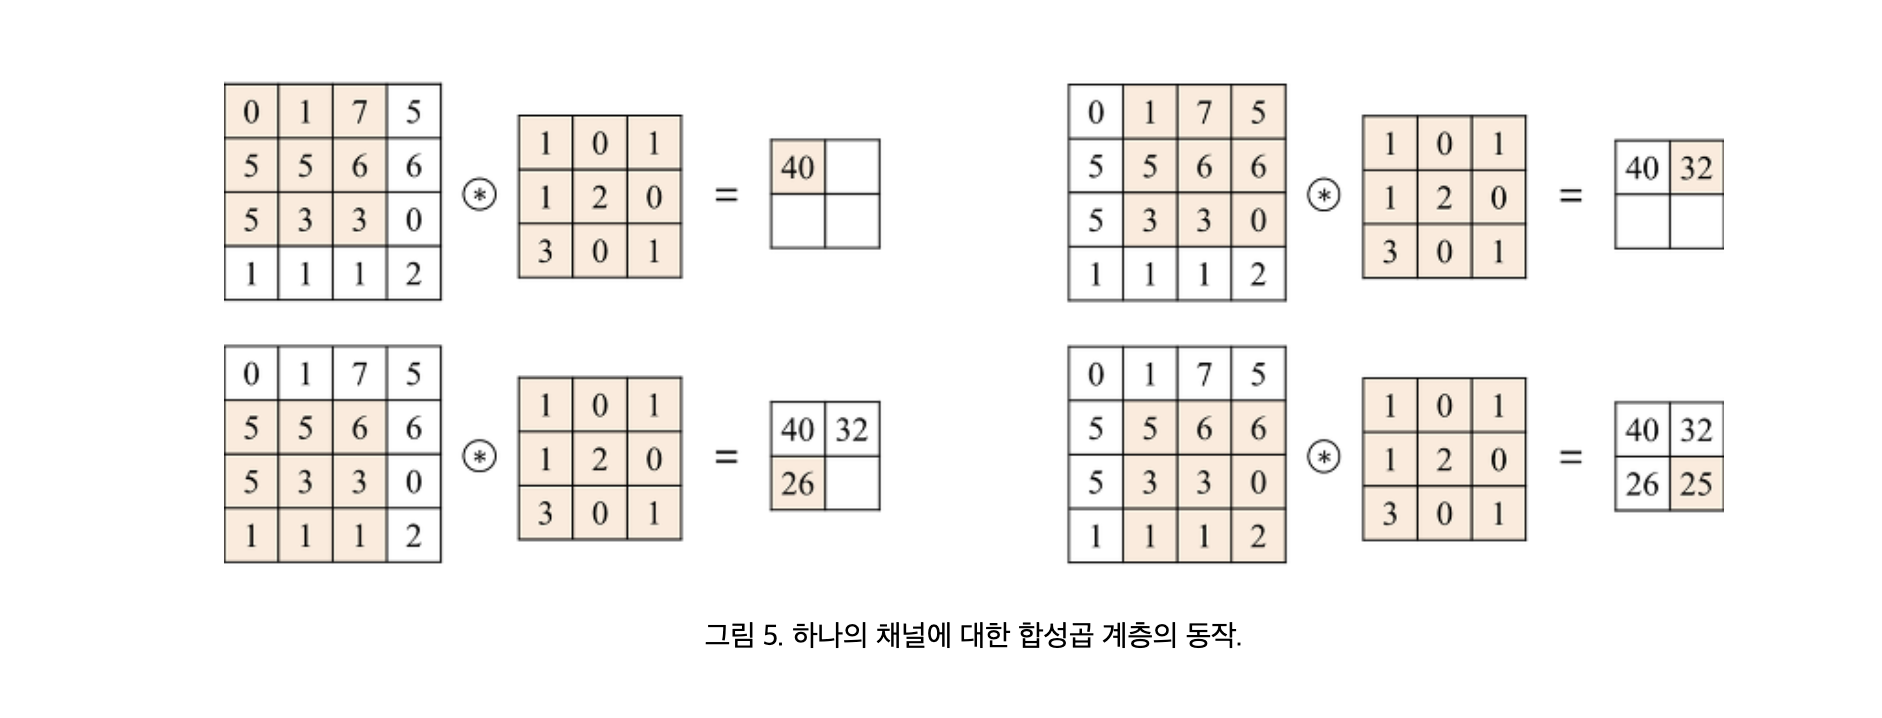

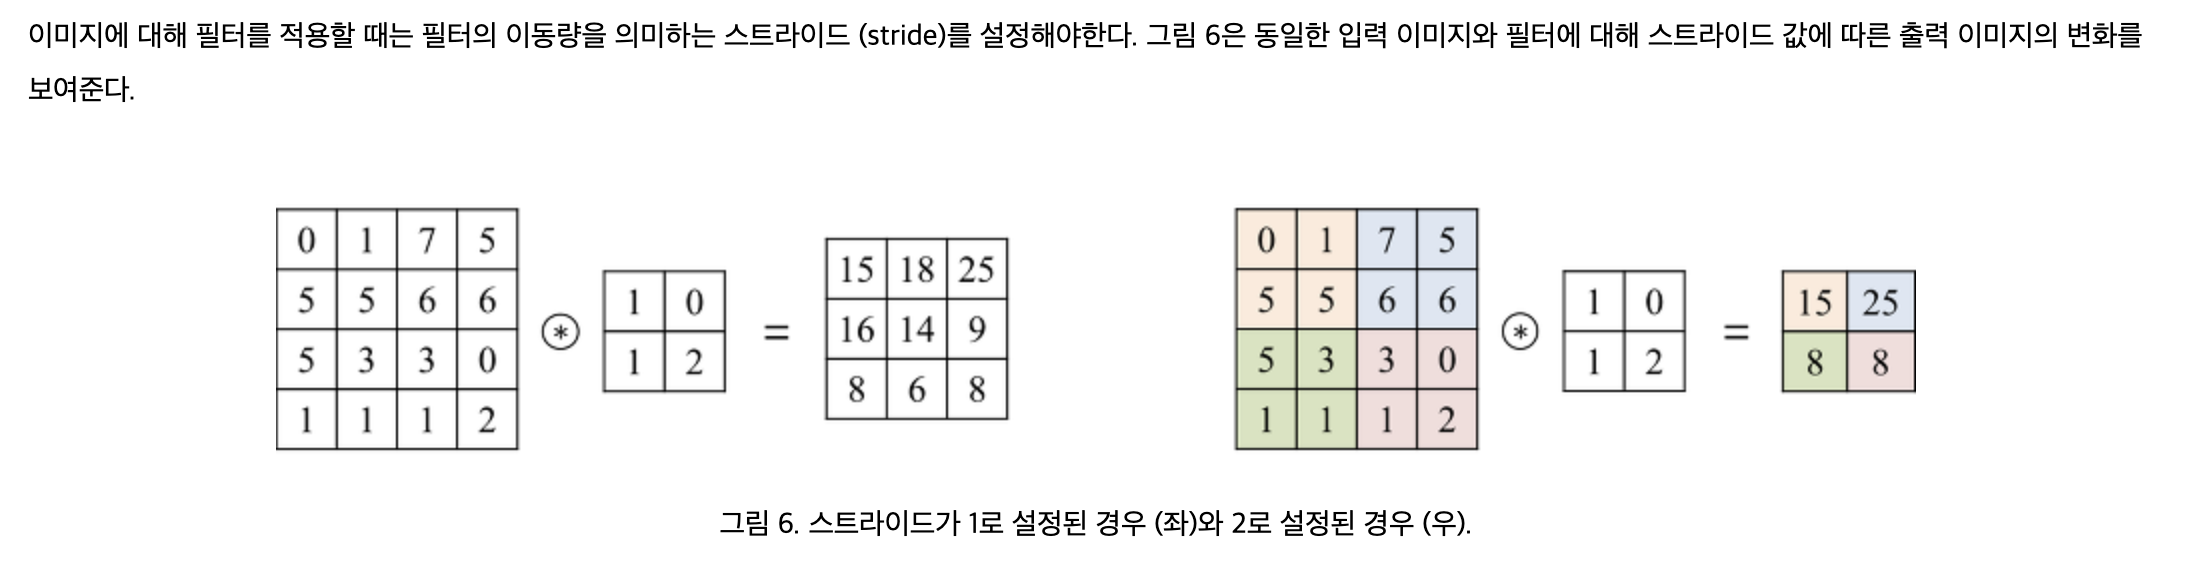

합성곱 층은 입력 데이터에 특정 크기의 커널(Kernal matrix)을 적용하여 새로운 출력값을 계산하는 역할을 함

합성곱 층에서 입력 데이터로부터 합성곱 연산을 수행하는 과정을 나타낸 것



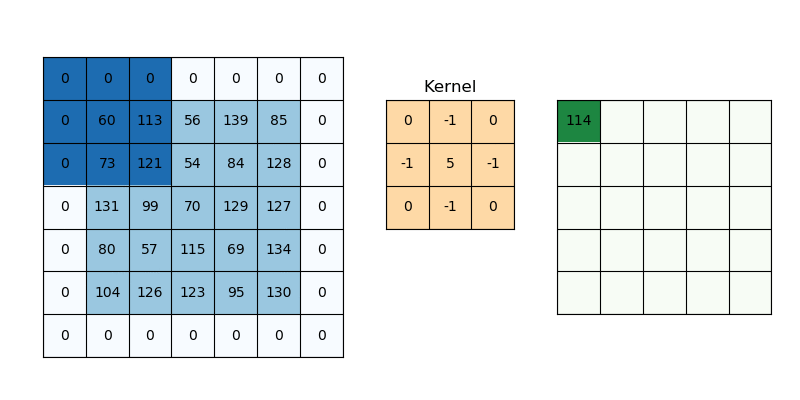

실제 합성곱층은 여러가지 필터를 가지고 필터마다 하나의 특성 맵을 출력하므로 3d로 표현하는것이 더 정확 

합성곱층이 입력에 여러필터를 동시에 적용하여 입력에 있는 여러 특성을 감지할수 있음 



3개의 채널로 구성된 입력 데이터(RGB)의 합성곱 연산이 수행되는 과정을 이미지로 나타낸 것

흑백 이미지는 하나의 채널만 가짐 

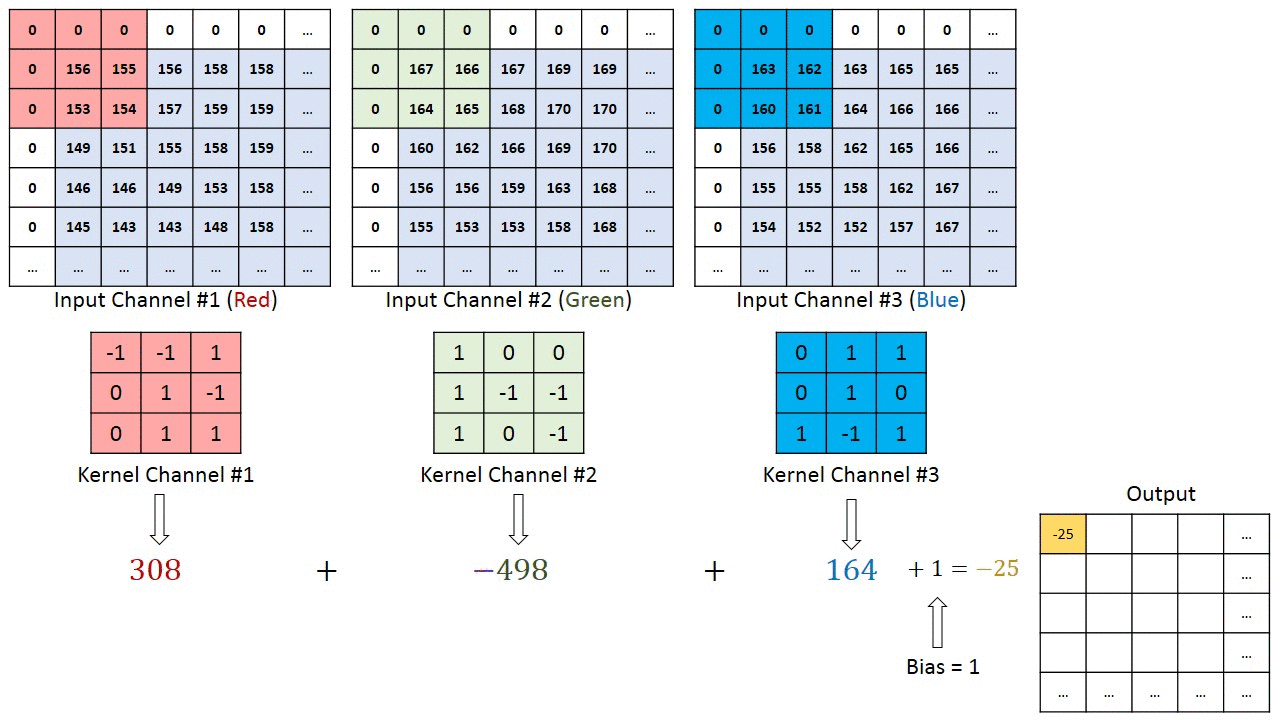

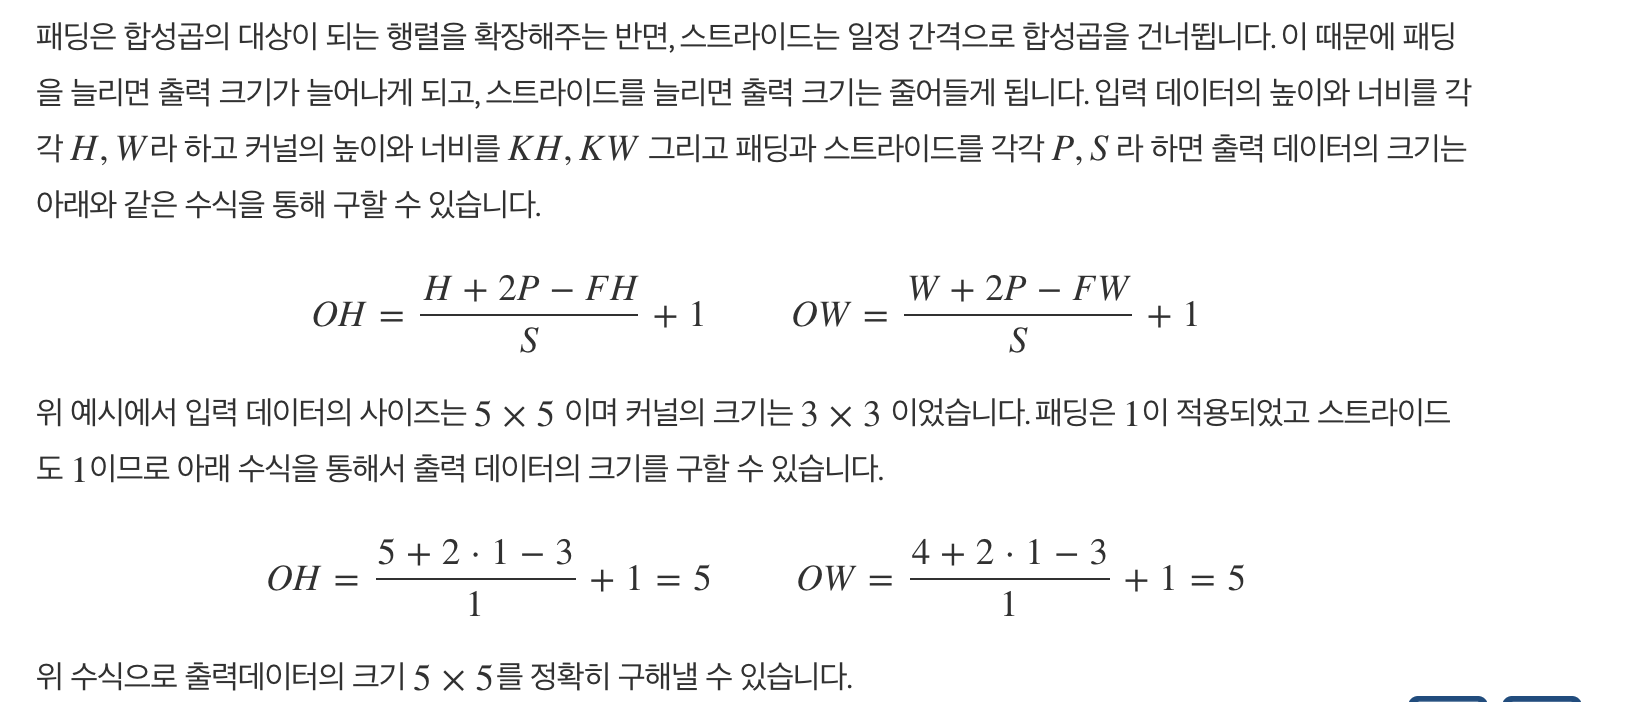

**텐서플로우 구현**

합성곱 층읠 가중치는 [fh,fw,fn',fn]형태의 4D로 표현됨 

편향은 fn으로 1D 텐서로 나타냄 

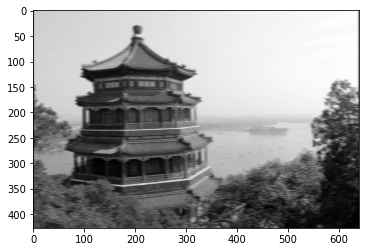

In [ ]:
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

china = load_sample_image("china.jpg") /255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1 #vertical 
filters[3, :, :, 1] = 1 # horizontal

outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME") #제로패딩, 1ㅅ,ㅌ,라읻,
#image 는 입력의 미니배치 -> 4D 텐서사용
plt.imshow(outputs[0, :, :, 1], cmap="gray")
plt.show()

**Convolutional layer**


In [12]:
import tensorflow 
from tensorflow import keras
#3x3 크기의 32개 필터와 스트라이드 1, same패딩을 사용하는 Conv2D층 
conv = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation="relu")

#많은 하이퍼 파라미터를 필요로함 


패딩은 valid 와 same 중 하나 지정 
 
valid를 사용하면 합성곱층에 제로패딩을 사용하지 않음 

패딩을 사용하는 이유는 패딩을 사용하지 않을 경우, 데이터의 Spatial 크기는 Conv Layer를 지날 때 마다 작아지게 되므로, 가장자리의 정보들이 사라지는 문제가 발생하기 때문에 패딩을 사용함






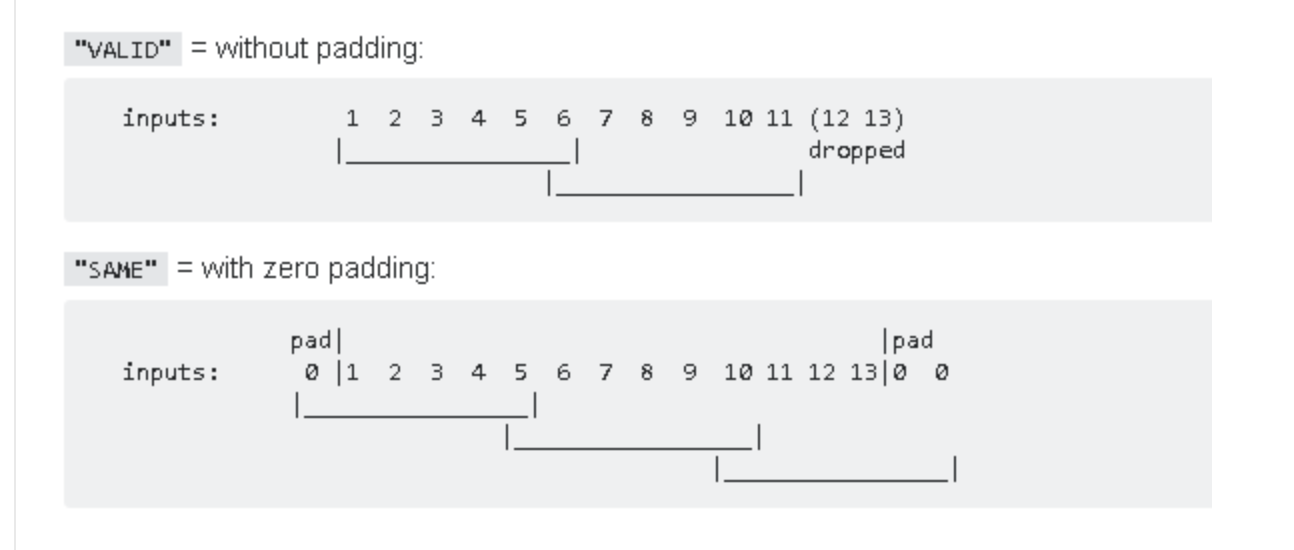